## Insurance Amount Predictor

### Life cycle of machine learning project

- Understanding the Problem Statement
- Data Collection
- Data Checks to perform
- Exploratory data analysis
- Data Pre-Processing
- Model Training
- Choose best model

### 1) Problem statement.

- This project understands how the Insurance Amount is affected by other variables such as 'age', 'sex', 'bmi', 'children', 'smoker', 'region'.

### 2) Data Collection


- Dataset was downloaded from kaggle
- Dataset consists of 1338 rows and 7 columns

In [2]:
import pandas as pd
df=pd.read_csv('insurance.csv')

In [3]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

### 2.1 Import Data and Required Packages.

- Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

- Import the CSV Data as Pandas DataFrame


In [6]:
data=pd.read_csv('insurance.csv')

In [7]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [8]:
data.shape

(1338, 7)

### 2.2 Dataset information


1. age - Age of the person 	(value column)
2. sex - Gender of person   (Male/Female)
3. bmi - Body mass index of person  (value column)
4. children - No. of children that person has   (value column)
5. smoker - The person is smoker or not	    (yes/no)
6. Region - Region in which the person lives    (categorical column)
7. charges - Amount of insurance based upon the features 1 to 6

### 3. Data Checks to perform


- check missing values
- check duplicates
- check data type
- check the no of unique values of each column
- check statistics of dataset
- check various categories present in the different column

#### 3.1 Check Missing values


In [11]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

##### There are no missing values in the dataset

##### 3.2 Check Duplicates


In [22]:
data.duplicated().sum()

0

In [23]:
data[data.duplicated()]

,age,sex,bmi,children,smoker,region,charges


In [24]:
data.drop_duplicates(inplace=True)

In [25]:
data[data.duplicated()]

,age,sex,bmi,children,smoker,region,charges


#### 3.3 Check data types


In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


#### 3.4 Checking the number of unique values of each column


In [27]:
data.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

#### 3.5 Check statistics of data set


In [29]:
data.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


#### 3.7 Exploring Data


In [33]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [34]:
print('categories in sex column: ',end=' ')
print(data['sex'].unique())
print('categories in smoker column: ',end=' ')
print(data['smoker'].unique())
print('categories in region column: ',end=' ')
print(data['region'].unique())

categories in sex column:  ['female' 'male']
categories in smoker column:  ['yes' 'no']
categories in region column:  ['southwest' 'southeast' 'northwest' 'northeast']


In [35]:
num_features=[col for col in data.columns if data[col].dtype!='O']
cat_features=[col for col in data.columns if data[col].dtype=='O']

print(f"We have {len(num_features)} numerical features: ",num_features)
print(f"We have {len(cat_features)} categorical features: ",cat_features)

We have 4 numerical features:  ['age', 'bmi', 'children', 'charges']
We have 3 categorical features:  ['sex', 'smoker', 'region']


### 4. Exploring Data ( Visualization )


In [36]:
data.head(2)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523


<Axes: xlabel='charges', ylabel='Count'>

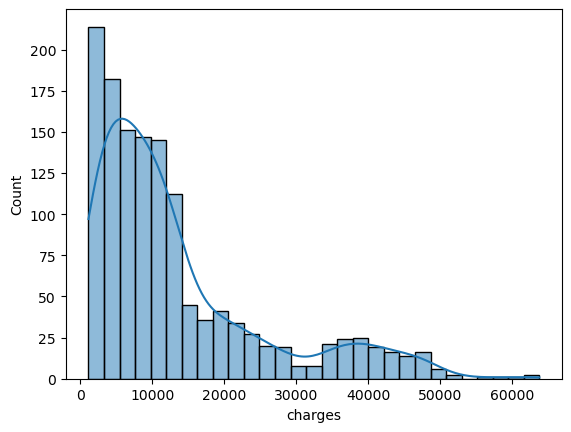

In [37]:
sns.histplot(data=data,x='charges',kde=True)

<Axes: xlabel='charges', ylabel='Count'>

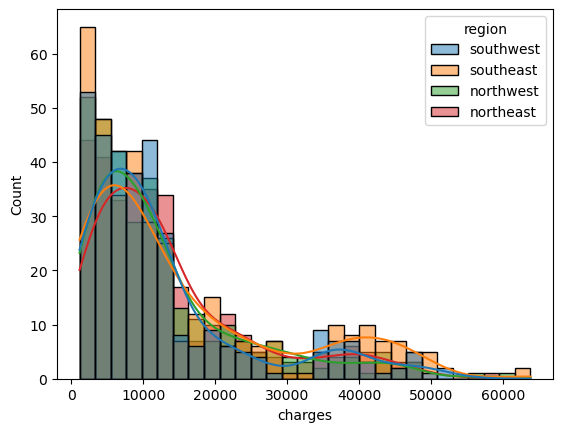

In [38]:
sns.histplot(data=data,x='charges',kde=True,hue='region')

<Axes: xlabel='charges', ylabel='Count'>

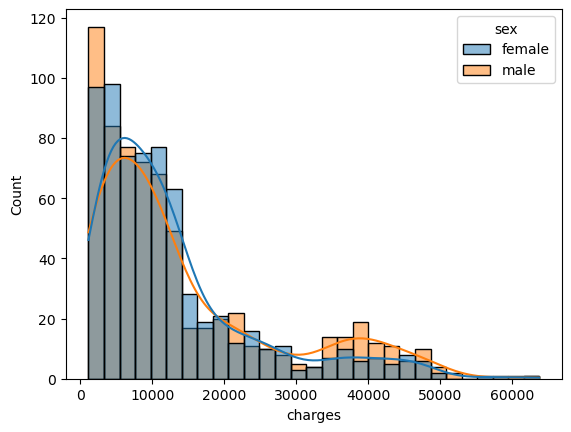

In [39]:
sns.histplot(data=data,x='charges',kde=True,hue='sex')


In [47]:
data['region'].value_counts()

region
southeast    364
southwest    325
northwest    324
northeast    324
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x22d0561c7a0>,
 [Text(0.7215890706705311, 0.8302464773119123, 'southeast'),
  Text(-0.8640286077747883, 0.6807749737958654, 'southwest'),
  Text(-0.7196362470877354, -0.8319397044723131, 'northwest'),
  Text(0.7963235543877186, -0.7588601957721266, 'northeast')],
 [Text(0.39359403854756236, 0.4528617148974066, '27.2%'),
  Text(-0.47128833151352084, 0.3713318038886538, '24.3%'),
  Text(-0.3925288620478557, -0.4537852933485344, '24.2%'),
  Text(0.43435830239330103, -0.41392374314843267, '24.2%')])

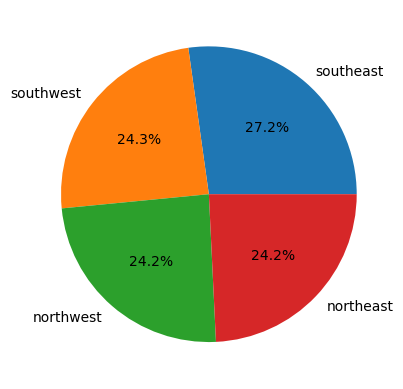

In [51]:
plt.pie(data['region'].value_counts().values,labels=data['region'].value_counts().index,autopct='%1.1f%%')

<Axes: ylabel='charges'>

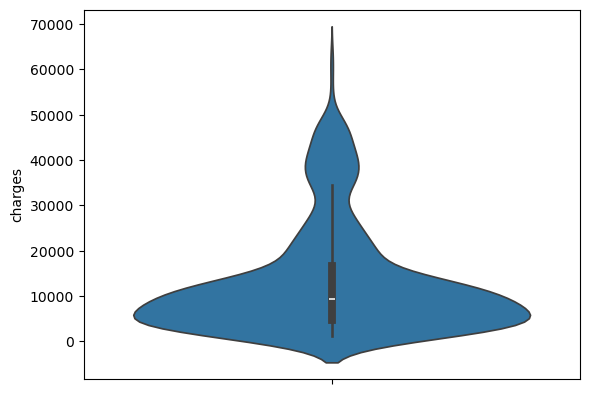

In [54]:
sns.violinplot(data=data,y='charges')

<Axes: ylabel='age'>

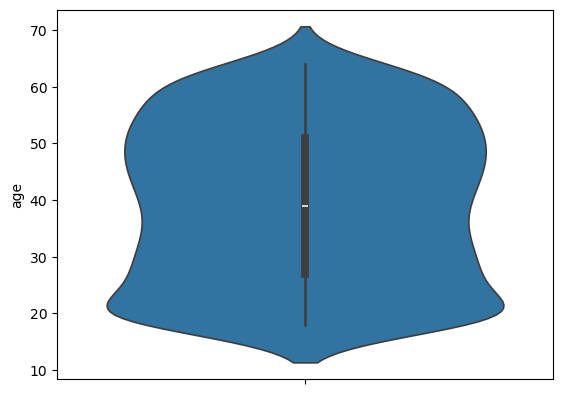

In [55]:
sns.violinplot(data=data,y='age')

<Axes: xlabel='age', ylabel='charges'>

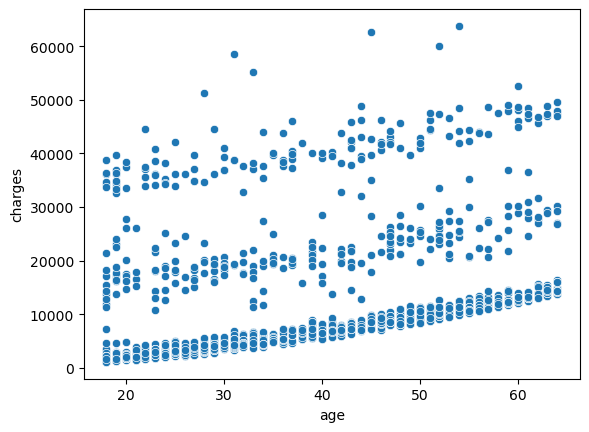

In [56]:
sns.scatterplot(x=data['age'],y=data['charges'])

In [57]:
data['sex'].value_counts()

sex
male      675
female    662
Name: count, dtype: int64

In [58]:
data.groupby('sex')['charges'].mean()

sex
female    12569.578844
male      13974.998864
Name: charges, dtype: float64

In [59]:
data.groupby('smoker')['charges'].mean()

smoker
no      8440.660307
yes    32050.231832
Name: charges, dtype: float64

In [61]:
data['smoker'].value_counts()

smoker
no     1063
yes     274
Name: count, dtype: int64

In [60]:
data.groupby('region')['charges'].mean()

region
northeast    13406.384516
northwest    12450.840844
southeast    14735.411438
southwest    12346.937377
Name: charges, dtype: float64

In [64]:
data.groupby('region')['smoker'].value_counts()

region     smoker
northeast  no        257
           yes        67
northwest  no        266
           yes        58
southeast  no        273
           yes        91
southwest  no        267
           yes        58
Name: count, dtype: int64

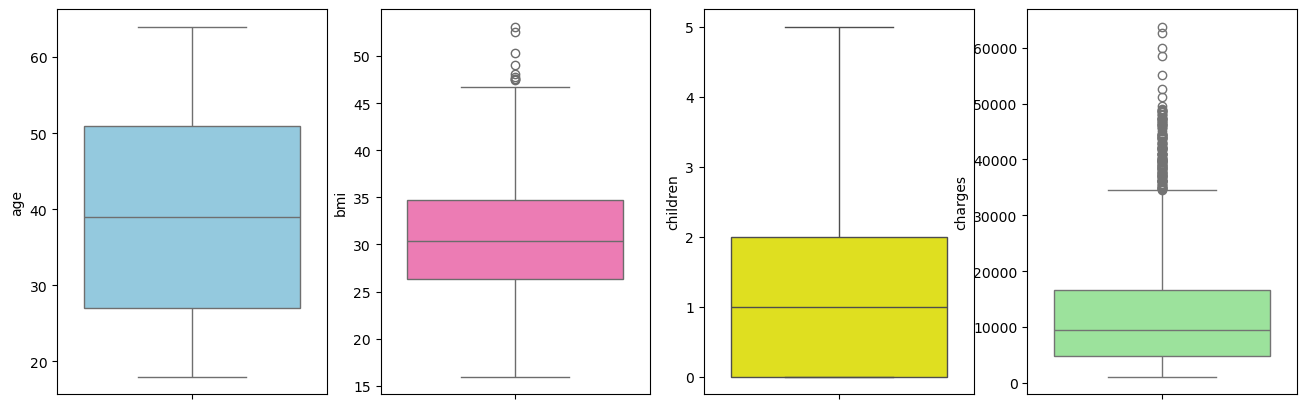

In [65]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(data['age'],color='skyblue')
plt.subplot(142)
sns.boxplot(data['bmi'],color='hotpink')
plt.subplot(143)
sns.boxplot(data['children'],color='yellow')
plt.subplot(144)
sns.boxplot(data['charges'],color='lightgreen')
plt.show()

In [66]:
data.groupby('children')['charges'].mean()

children
0    12384.695344
1    12731.171832
2    15073.563734
3    15355.318367
4    13850.656311
5     8786.035247
Name: charges, dtype: float64

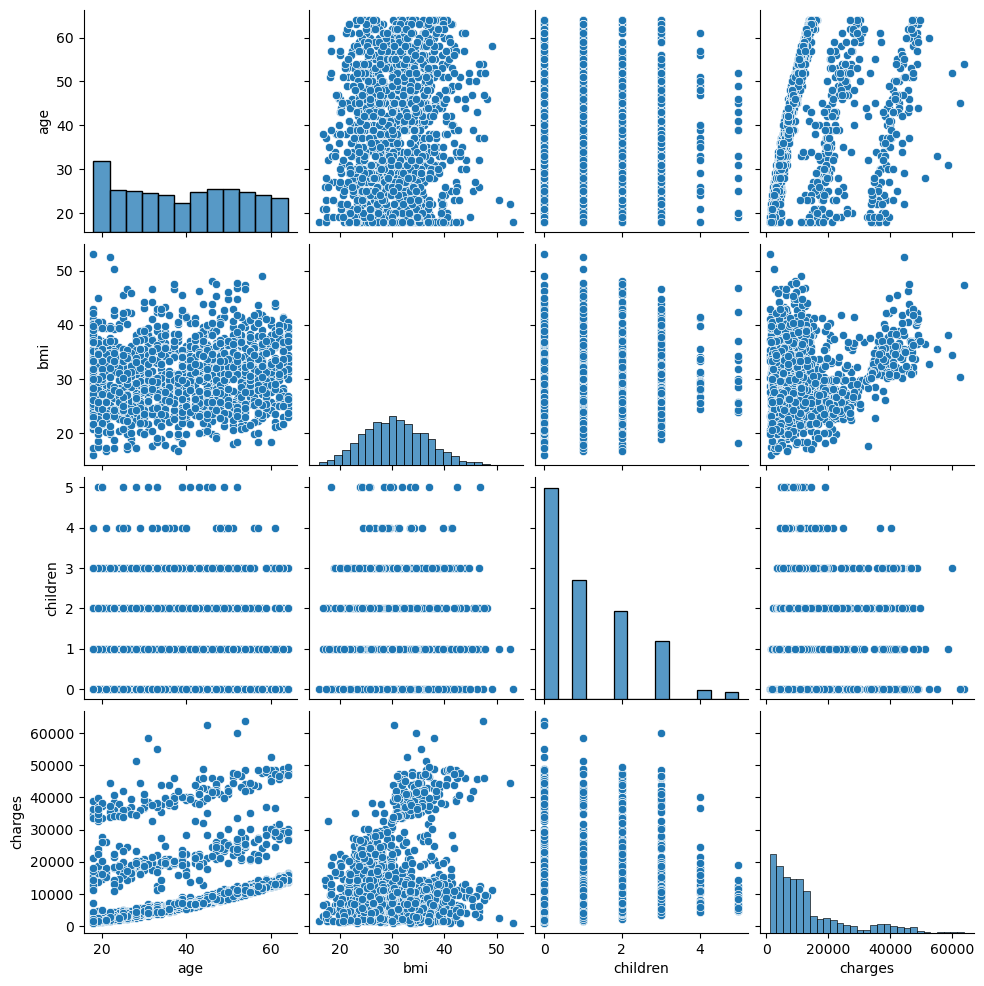

In [67]:
sns.pairplot(data)

In [71]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [75]:
X=data.drop(columns=['charges'])

In [76]:
y=data['charges']

In [78]:
X.head()

,age,sex,bmi,children,smoker,region
0,19,female,27.900,0,yes,southwest
1,18,male,33.770,1,no,southeast
2,28,male,33.000,3,no,southeast
3,33,male,22.705,0,no,northwest
4,32,male,28.880,0,no,northwest


In [80]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [83]:
num_features=X.select_dtypes(exclude='O').columns

In [84]:
num_features

Index(['age', 'bmi', 'children'], dtype='object')

In [85]:
cat_features=X.select_dtypes(include='O').columns
cat_features

Index(['sex', 'smoker', 'region'], dtype='object')

In [115]:
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer
encoder=OneHotEncoder()
scaler=StandardScaler()
preprocessor=ColumnTransformer(
    [
    ('onehotencoder',encoder,cat_features),
    ('standardscaler',scaler,num_features)
    ])

In [116]:
X=preprocessor.fit_transform(X)

In [120]:
X

array([[ 1.        ,  0.        ,  0.        , ..., -1.44041773,
        -0.45315959, -0.90923416],
       [ 0.        ,  1.        ,  1.        , ..., -1.51164747,
         0.50942165, -0.07944162],
       [ 0.        ,  1.        ,  1.        , ..., -0.79935006,
         0.3831546 ,  1.58014347],
       ...,
       [ 1.        ,  0.        ,  1.        , ..., -1.51164747,
         1.01448983, -0.90923416],
       [ 1.        ,  0.        ,  1.        , ..., -1.29795825,
        -0.79752426, -0.90923416],
       [ 1.        ,  0.        ,  0.        , ...,  1.55123139,
        -0.26129928, -0.90923416]])

In [121]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42)

In [122]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [124]:
list({'a':1,'b':2})

['a', 'b']

In [126]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor

In [127]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 6097.6933
- Mean Absolute Error: 4208.2209
- R2 Score: 0.7298
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5939.2157
- Mean Absolute Error: 4068.2231
- R2 Score: 0.7960


Lasso
Model performance for Training set
- Root Mean Squared Error: 6097.7227
- Mean Absolute Error: 4207.8340
- R2 Score: 0.7297
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5941.1637
- Mean Absolute Error: 4069.7235
- R2 Score: 0.7959


Ridge
Model performance for Training set
- Root Mean Squared Error: 6097.7903
- Mean Absolute Error: 4211.9768
- R2 Score: 0.7297
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5946.6816
- Mean Absolute Error: 4076.6877
- R2 Score: 0.7955


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 4882.1469
- Mean Absolute Error: 2899.3989


In [128]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)


,Model Name,R2_Score
7,CatBoosting Regressor,0.878205
5,Random Forest Regressor,0.870841
6,XGBRegressor,0.850341
8,AdaBoost Regressor,0.834252
0,Linear Regression,0.795996
1,Lasso,0.795862
2,Ridge,0.795483
4,Decision Tree,0.788918
3,K-Neighbors Regressor,0.779547


In [129]:
cat_reg = CatBoostRegressor(verbose=False)
md = cat_reg.fit(X_train, y_train)
y_pred = md.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 87.82


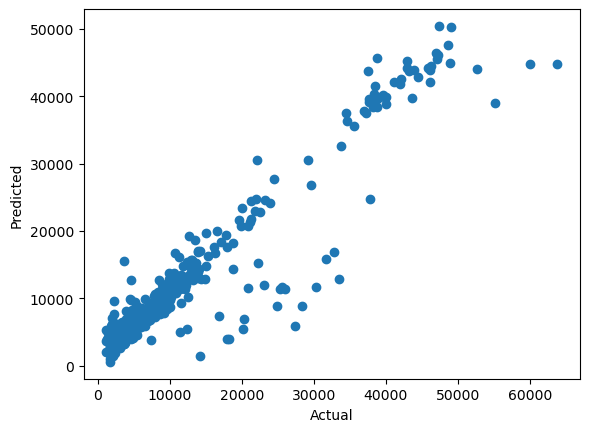

In [130]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

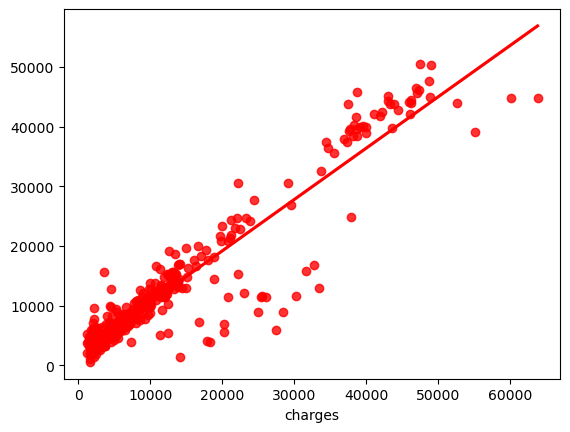

In [131]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');
